In [4]:
import pandas as pd 
import numpy as np
from icecream import ic
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# import models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso




In [5]:
washington_path = '/Users/amine/Desktop/Datathon BCG X/comptages-routiers-permanents_champs.csv'
sts_path = '/Users/amine/Desktop/Datathon BCG X/comptages-routiers-permanents_saints_peres.csv'
convention_path = '/Users/amine/Desktop/Datathon BCG X/comptages-routiers-permanents_convention.csv'

# Washington - Champs Elysées 

In [6]:
washington_df = pd.read_csv(washington_path, sep=';')
washington_df.head()

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,4264,AV_Champs_Elysees,2023-02-01T23:00:00+01:00,764.0,11.28000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
1,4264,AV_Champs_Elysees,2023-02-01T22:00:00+01:00,819.0,16.52056,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
2,4264,AV_Champs_Elysees,2023-02-01T20:00:00+01:00,1082.0,19.98722,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
3,4264,AV_Champs_Elysees,2023-02-01T18:00:00+01:00,1027.0,23.27334,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
4,4264,AV_Champs_Elysees,2022-12-07T00:00:00+01:00,528.0,68.14334,Bloqué,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605, 2.3017227924560624","{""coordinates"": [[2.300995147533877, 48.871777..."


In [7]:
washington_df.columns

Index(['Identifiant arc', 'Libelle', 'Date et heure de comptage',
       'Débit horaire', 'Taux d'occupation', 'Etat trafic',
       'Identifiant noeud amont', 'Libelle noeud amont',
       'Identifiant noeud aval', 'Libelle noeud aval', 'Etat arc',
       'Date debut dispo data', 'Date fin dispo data', 'geo_point_2d',
       'geo_shape'],
      dtype='object')

In [8]:
washington_df.shape

(9314, 15)

In [9]:
for col in washington_df.columns:
    ic(washington_df[col].value_counts())

ic| washington_df[col].value_counts(): 4264    9314
                                       Name: Identifiant arc, dtype: int64
ic| washington_df[col].value_counts(): AV_Champs_Elysees    9314
                                       Name: Libelle, dtype: int64


ic| washington_df[col].value_counts(): 2023-08-01T02:00:00+02:00    1
                                       2023-02-01T23:00:00+01:00    1
                                       2023-08-31T07:00:00+02:00    1
                                       2023-08-31T05:00:00+02:00    1
                                       2023-08-31T03:00:00+02:00    1
                                                                   ..
                                       2022-12-06T23:00:00+01:00    1
                                       2022-12-06T21:00:00+01:00    1
                                       2022-12-06T19:00:00+01:00    1
                                       2022-12-06T17:00:00+01:00    1
                                       2022-12-06T15:00:00+01:00    1
                                       Name: Date et heure de comptage, Length: 9314, dtype: int64
ic| washington_df[col].value_counts(): 1118.0    21
                                       1162.0    20
                           

In [10]:
washington_df.drop(columns=['Identifiant arc', 'Identifiant noeud amont', 'Libelle noeud amont','Identifiant noeud aval', 'Libelle noeud aval'], inplace=True)

In [11]:
washington_df.columns

Index(['Libelle', 'Date et heure de comptage', 'Débit horaire',
       'Taux d'occupation', 'Etat trafic', 'Etat arc', 'Date debut dispo data',
       'Date fin dispo data', 'geo_point_2d', 'geo_shape'],
      dtype='object')

In [12]:
washington_df.rename(columns={'Libelle':'id', 'Date et heure de comptage':'timestamp', 'Débit horaire':'debit_horaire', "Taux d'occupation":'taux_occupation', 'Etat trafic':'etat_trafic', 'Etat arc':'etat_arc'}, inplace=True)

In [29]:
washington_df.sort_values(by='timestamp', inplace=True)
# set timestamp as index
washington_df.set_index('timestamp', inplace=True)

In [14]:
washington_df['debit_horaire'].head()

2399    672.0
2398    513.0
2397    494.0
2866    513.0
2396    484.0
Name: debit_horaire, dtype: float64

In [15]:
washington_df['taux_occupation'].head()

2399    8.89223
2398    7.12889
2397    6.22500
2866    5.80723
2396    5.57111
Name: taux_occupation, dtype: float64

In [16]:
washington_df['timestamp'].apply(type).value_counts()

<class 'str'>    9314
Name: timestamp, dtype: int64

In [17]:
washington_df['timestamp'] = pd.to_datetime(washington_df['timestamp'], utc = True)

In [18]:
washington_df['year'] = washington_df['timestamp'].dt.year
washington_df['month'] = washington_df['timestamp'].dt.month
washington_df['day'] = washington_df['timestamp'].dt.day
washington_df['hour'] = washington_df['timestamp'].dt.hour
washington_df['weekday'] = washington_df['timestamp'].dt.weekday


/var/folders/k9/5lw2xpwn20v_5c2xxrljc9vw0000gn/T/ipykernel_19075/3286985069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = washington_df.corr()


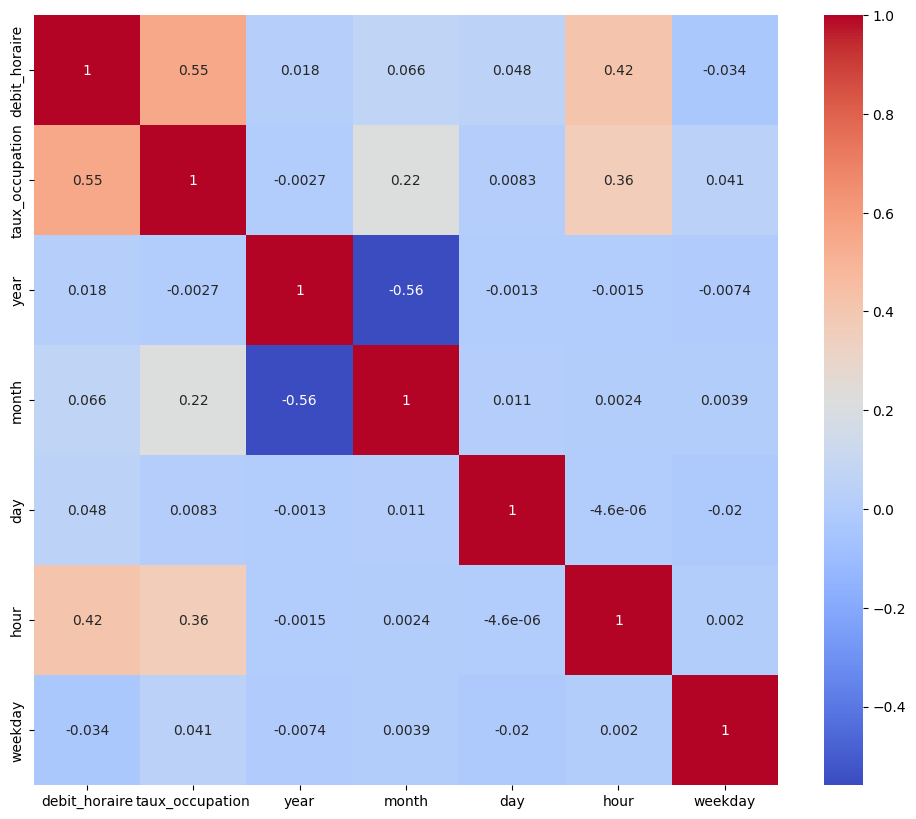

In [19]:
plt.figure(figsize=(12, 10))
cm = washington_df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

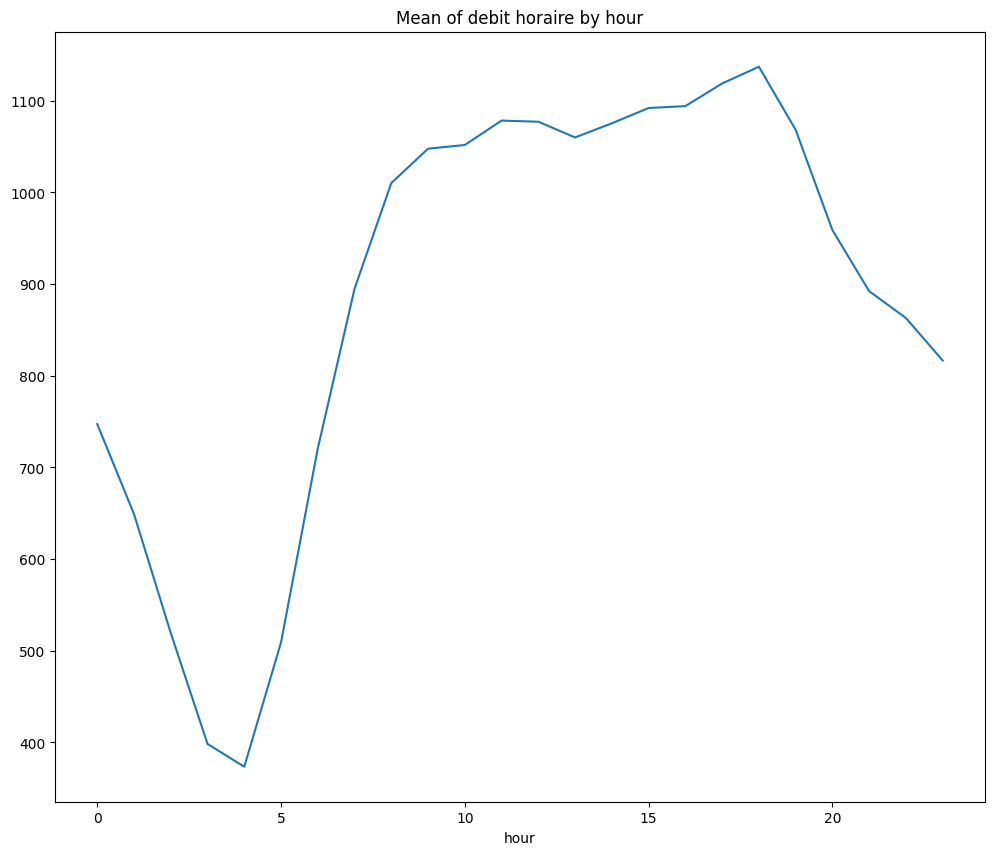

In [20]:
# mean of debit horaire by hour
plt.figure(figsize=(12, 10))
washington_df.groupby('hour')['debit_horaire'].mean().plot()
plt.title('Mean of debit horaire by hour')
plt.show()

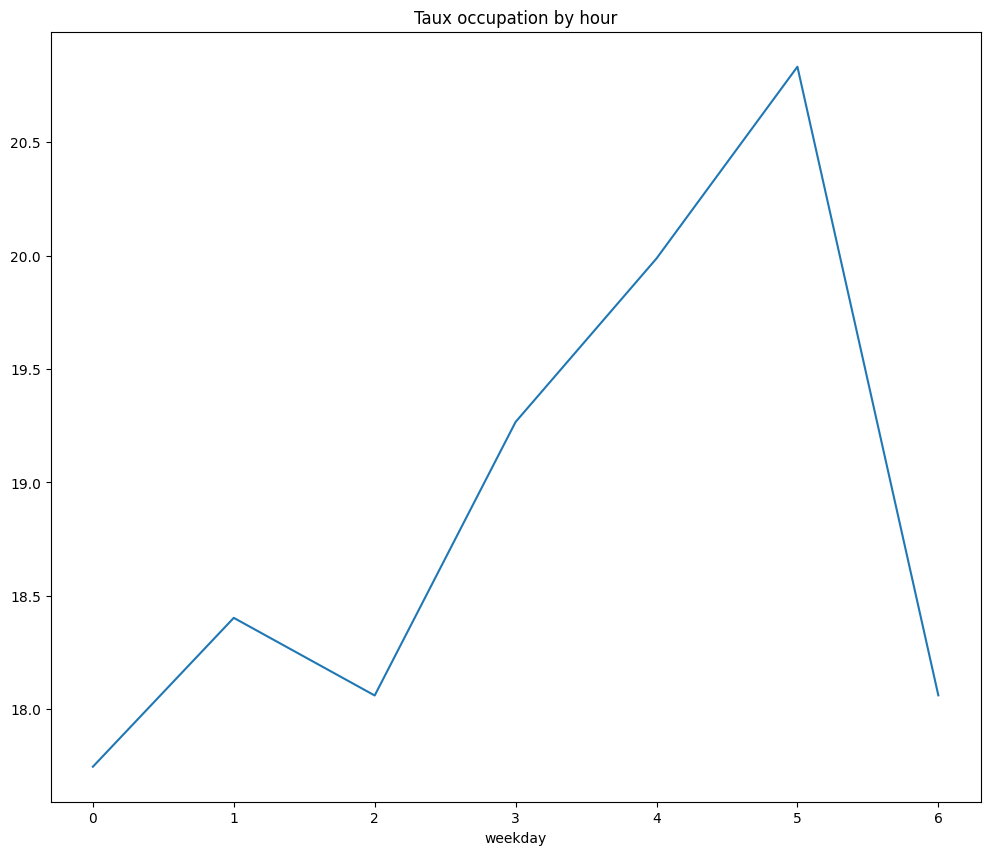

In [21]:
# taux_occupation by hour 
plt.figure(figsize=(12, 10))
washington_df.groupby('weekday')['taux_occupation'].mean().plot()
plt.title('Taux occupation by hour')
plt.show()


In [22]:
washington_df.columns

Index(['id', 'timestamp', 'debit_horaire', 'taux_occupation', 'etat_trafic',
       'etat_arc', 'Date debut dispo data', 'Date fin dispo data',
       'geo_point_2d', 'geo_shape', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

# Implementation of RandomForest imputing

In [43]:
def impute_missing_values(df, max_iter=5, espilon=0.001):

    performance = {}
    step = +np.inf
    n_iter = 0

    missing_cols = df.columns[df.isna().any()].tolist()
    X = df.copy()

    for col in missing_cols:
        if X[col].dtype == 'object':
            X[col].fillna(X[col].mode()[0], inplace=True)
        else:
            X[col].fillna(X[col].mean(), inplace=True)
    # for col with missing values, fill with mean for continuous and most frequent for categorical

    while n_iter < max_iter and step > espilon :
        n_iter += 1
        for col in missing_cols:

            # split into train and test
            X_train = X[df[col].notnull()]
            X_test = X[df[col].isnull()]

            # train and predict
            y_train = X_train[col]
            X_train = X_train.drop(columns=[col])

            y_test = X_test[col]
            X_test = X_test.drop(columns=[col])

            # fit model
            model = RandomForestRegressor()
            model.fit(X_train, y_train)

            # predict
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            performance[col] = mse

            # fill missing values
            X.loc[df[col].isnull(), col] = y_pred

            # compute error
        step = sum(performance.values())
        print(step)

    return X, performance
    

def encode_categorical(df):
    X = df.copy()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        X[col] = OrdinalEncoder().fit_transform(X[col].values.reshape(-1, 1))
    return X

In [44]:
washington_encoded = encode_categorical(washington_df)
impute_missing_values(washington_encoded, max_iter=5, espilon=0.001)

72711.70840095163
12618.814140178334
4753.67365980551
3739.2938660851505
4159.37745562952


(                            id  debit_horaire  taux_occupation  etat_trafic  \
 timestamp                                                                     
 2022-11-01 03:00:00+00:00  0.0          672.0          8.89223          1.0   
 2022-11-01 04:00:00+00:00  0.0          513.0          7.12889          1.0   
 2022-11-01 05:00:00+00:00  0.0          494.0          6.22500          1.0   
 2022-11-01 06:00:00+00:00  0.0          513.0          5.80723          1.0   
 2022-11-01 07:00:00+00:00  0.0          484.0          5.57111          1.0   
 ...                        ...            ...              ...          ...   
 2023-11-30 19:00:00+00:00  0.0         1433.0         30.87000          4.0   
 2023-11-30 20:00:00+00:00  0.0         1253.0         24.38111          3.0   
 2023-11-30 21:00:00+00:00  0.0         1069.0         20.40723          3.0   
 2023-11-30 22:00:00+00:00  0.0          950.0         16.66334          3.0   
 2023-11-30 23:00:00+00:00  0.0         

110870.12023810708
275.5768782705097
229.74602461197333
243.27344722838137
229.16055898004424


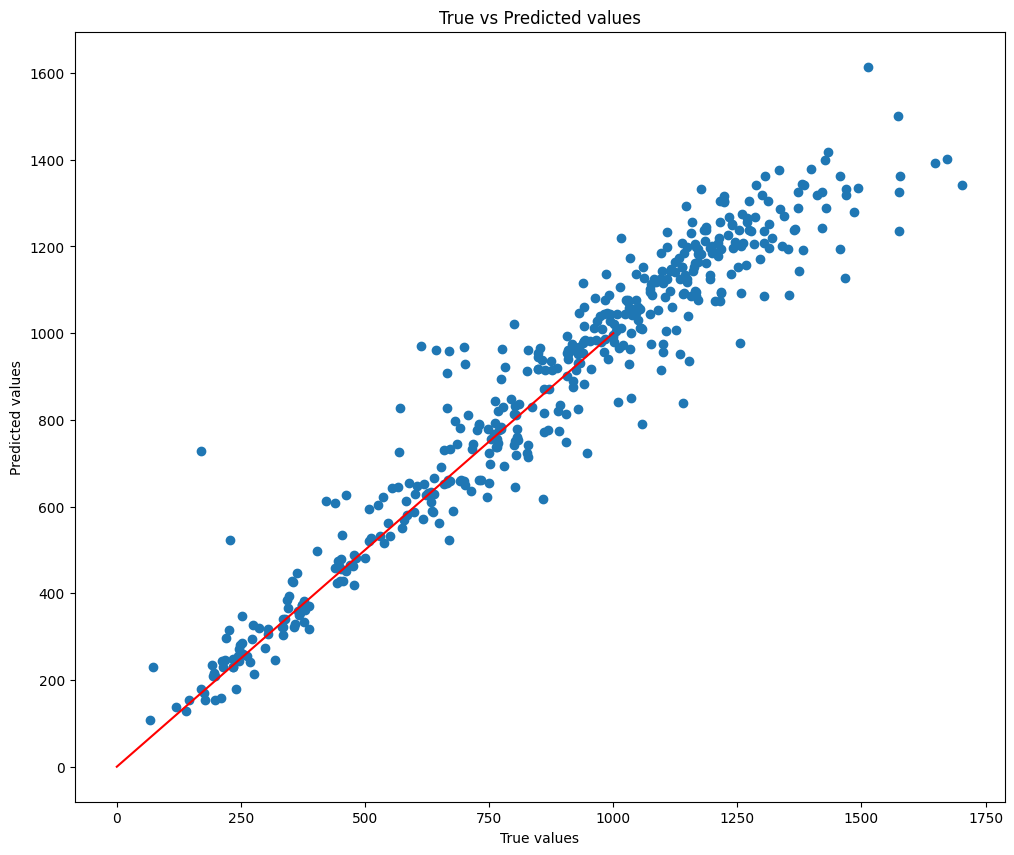

In [46]:
# build a test_imputation_df corresponding to wahsington_df without missing valiues 
test_imputation_df = washington_encoded.copy()
test_imputation_df.dropna(inplace=True)

# adding 5% of  missing values to test_imputation_df
rows_with_nan = test_imputation_df['debit_horaire'].sample(frac=0.05).index
test_imputation_df.loc[rows_with_nan, 'debit_horaire'] = np.nan

test_imputed_df, performance = impute_missing_values(test_imputation_df, max_iter=5, espilon=0.001)

y_pred = test_imputed_df.loc[rows_with_nan, 'debit_horaire']
y_true = washington_encoded.loc[rows_with_nan, 'debit_horaire']

# plot a report with some metrics 

plt.figure(figsize=(12, 10))
plt.scatter(y_true, y_pred)
plt.plot([0, 2000], [0, 2000], color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted values')
plt.show()


111289.02950996939
231.6280909090909
227.3084144124169
235.9342117516629
261.8600150776051
111048.43471395472
173.21113968957872
184.52223702882478
234.6476274944568
287.07277915742793
227.65755920177372
111716.09884007482
275.97207782705095
253.19946186252776
295.4478292682927
220.20853237250557
203.71927139689592
201.78004878048793
111139.44077740036
214.7630536585367
244.84847827051004
224.23585898004433
263.71664478935713
242.17875809312616
228.29557915742785
246.85096784922388
110587.8721026465
286.1960796008869
304.9672658536583
229.6109946784922
243.53470665188473
253.1392390243902
241.46017738359197
258.35393082039906
254.3642195121952


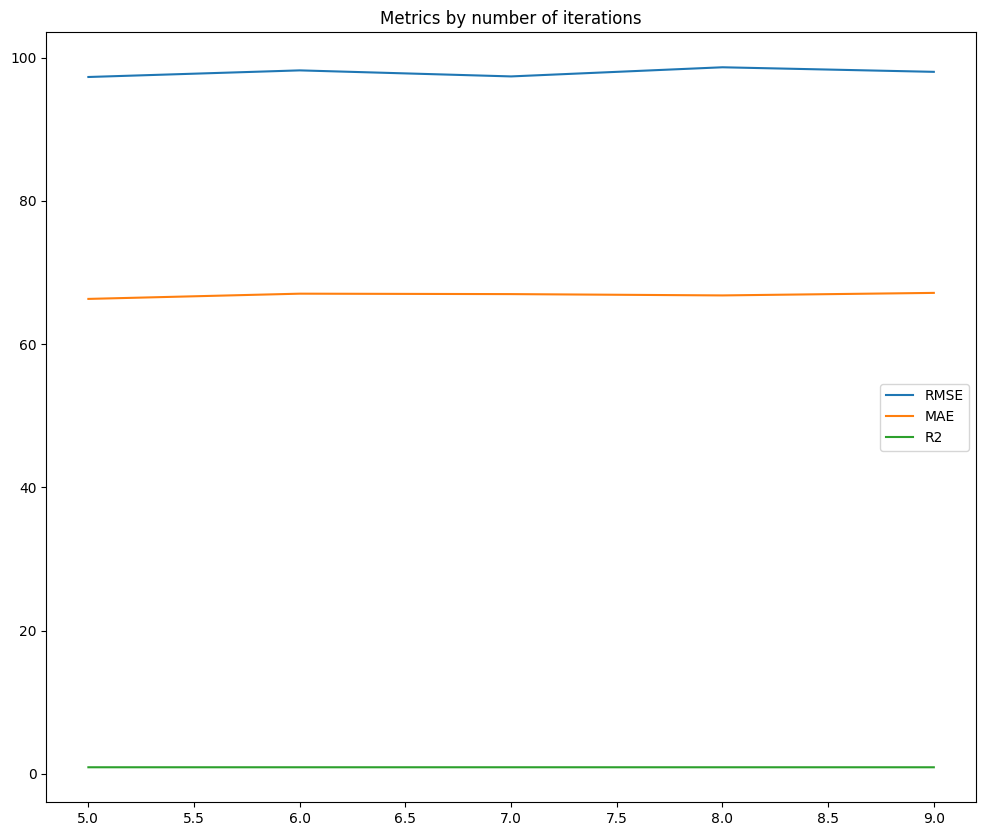

In [49]:
rmse = []
mae = []
r_2 = []
for i in range(5,10):
    test_imputed_df, performance = impute_missing_values(test_imputation_df, max_iter=i, espilon=0.001)
    y_pred = test_imputed_df.loc[rows_with_nan, 'debit_horaire']
    y_true = washington_encoded.loc[rows_with_nan, 'debit_horaire']
    rmse.append(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae.append(mean_absolute_error(y_true, y_pred))
    r_2.append(r2_score(y_true, y_pred))

plt.figure(figsize=(12, 10))
plt.plot(range(5,10), rmse, label='RMSE')
plt.plot(range(5,10), mae, label='MAE')
plt.plot(range(5,10), r_2, label='R2')
plt.legend()
plt.title('Metrics by number of iterations')
plt.show()


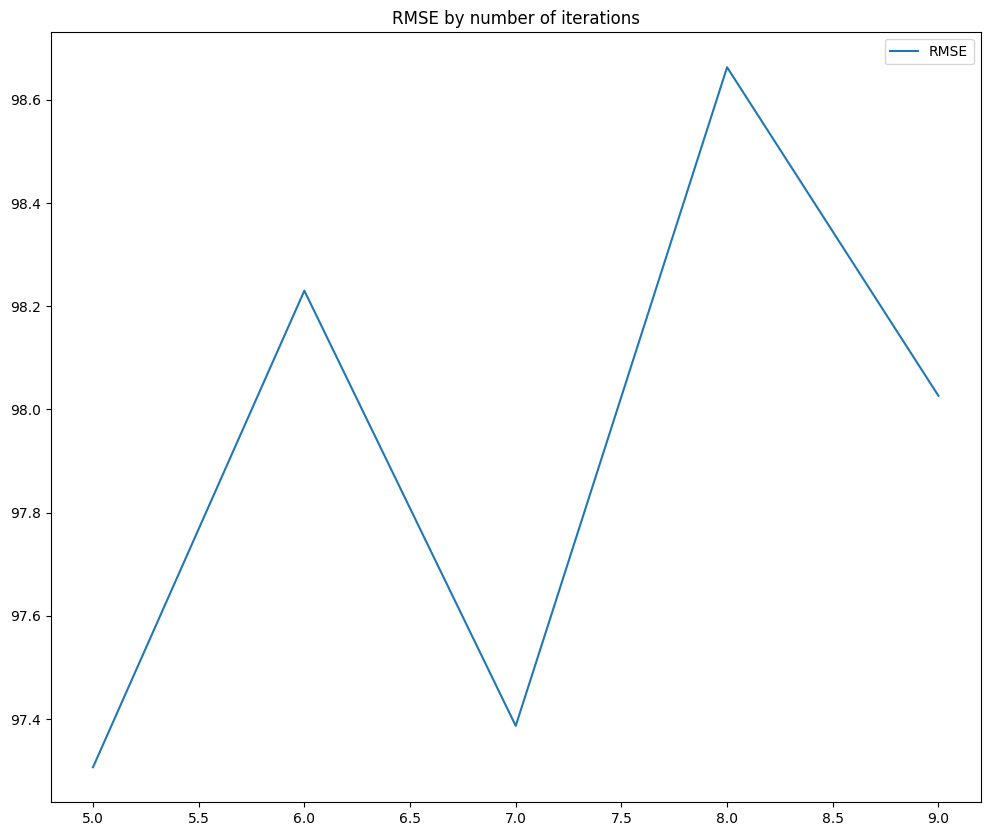

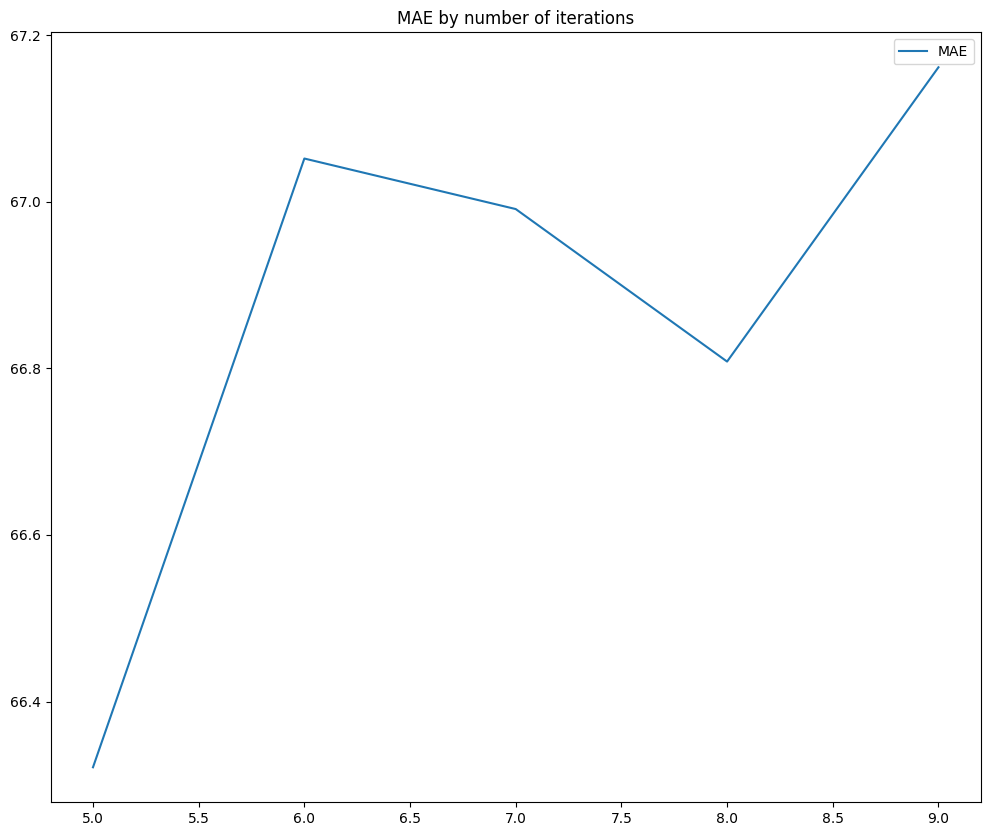

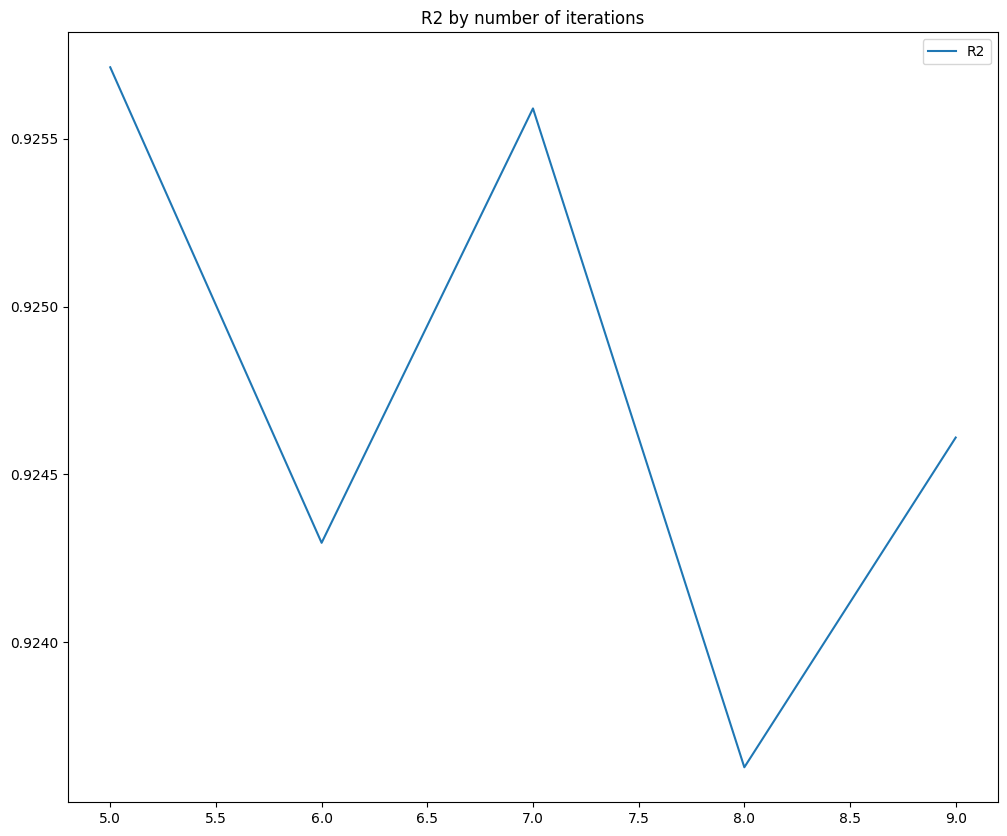

In [50]:
# one plot for each metric

plt.figure(figsize=(12, 10))
plt.plot(range(5,10), rmse, label='RMSE')
plt.legend()
plt.title('RMSE by number of iterations')
plt.show()

plt.figure(figsize=(12, 10))
plt.plot(range(5,10), mae, label='MAE')
plt.legend()
plt.title('MAE by number of iterations')
plt.show()


plt.figure(figsize=(12, 10))
plt.plot(range(5,10), r_2, label='R2')
plt.legend()
plt.title('R2 by number of iterations')
plt.show()


# Model implementation

In [271]:
features = ['etat_trafic', 'etat_arc', 'year', 'month', 'day', 'hour', 'weekday']
target = 'debit_horaire'

# drop rows with missing target values
washington_df.dropna(subset=[target], inplace=True)

# select categorical features
X = washington_df[features]
y = washington_df[target]

cateforical_features = []
for col in X.columns:
    if X[col].dtype == 'object':
        cateforical_features.append(col)

numerical_features = list(set(X.columns) - set(cateforical_features))
# normalize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

/var/folders/k9/5lw2xpwn20v_5c2xxrljc9vw0000gn/T/ipykernel_1313/2487925938.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [272]:
# One hot encoding for categorical features
X = pd.get_dummies(X, columns=cateforical_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression RMSE: {rmse_test}')

rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(f'Linear Regression RMSE: {rmse_train}')


Linear Regression RMSE: 215.9968791000186
Linear Regression RMSE: 227.5313594023835


In [278]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Random Forest RMSE: {rmse_test }')

rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(f'Random Forest RMSE: {rmse_train}')


Random Forest RMSE: 110.54665012828582
Random Forest RMSE: 42.139355837564295
